# Investigation into Global Economy and Solar Activity (Sunspot Number)

This notebook will look at whether there is a correlation between the cycles of the sun and the cycles of economic activity on Earth around the globe.

To do this, I have initially downloaded two datasets:  
1. The Jordà-Schularick-Taylor Macrohistory Database from http://www.macrohistory.net/data/  
2. Yearly Mean Total Sunspot Number from http://www.sidc.be/silso/datafiles  

These datasets are both not very fine in time resolution (looking at only yearly values) but they do span a long period of time.
The macrohistory database looks at 25 economic indicators from 1870 and across 17 advanced economies.
The sunpost number dataset looks at the mean annual sunspot number from 1700.

We will begin by importing the necessary modules and opening the data:

In [1]:
# Import modules
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
# There are three sheets in the Economic Database Excel file, and we are interested in the second sheet, which has the data 
df_eco = pd.read_excel("data/JSTdatasetR3.xlsx", 
                            sheet_name = 1)

# The description of each column is in sheet three:
df_eco_descr = pd.read_excel("data/JSTdatasetR3.xlsx", 
                             sheet_name = 2,
                            header = None,
                            names = ['Column Name','Description'])

In [3]:
# View the first few values
df_eco.head(10)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,debtgdp,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,0.172568,NaN,NaN,0.366946,0,54.792,1.680,1.680,53.112,0.492253
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.191799,NaN,NaN,0.369146,0,53.748,1.766,1.766,51.982,0.469877
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.154920,NaN,NaN,0.369239,0,55.822,1.470,1.470,54.352,0.484794
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.142692,NaN,NaN,0.362405,0,65.380,1.364,1.364,64.016,0.469877
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.194322,NaN,NaN,0.372223,0,71.478,1.434,1.434,70.044,0.566836
5,1875,Australia,AUS,193,1874.0,4138.207044,17.592107,25.669505,300.74,0.160564,...,0.233687,NaN,NaN,0.360926,0,79.954,1.564,1.564,78.390,0.566836
6,1876,Australia,AUS,193,1929.0,4007.257646,17.019033,24.806161,311.26,0.167878,...,0.158506,NaN,NaN,0.372022,0,86.206,1.860,1.860,84.346,0.522086
7,1877,Australia,AUS,193,1995.0,4036.090226,17.145652,25.217057,313.66,0.209934,...,0.176092,NaN,NaN,0.399911,0,101.036,2.420,2.420,98.616,0.522086
8,1878,Australia,AUS,193,2062.0,4277.400582,18.205261,26.560551,324.30,0.181141,...,0.172852,NaN,NaN,0.412573,0,106.648,2.754,2.754,103.894,0.589211
9,1879,Australia,AUS,193,2127.0,4204.983545,17.887247,26.519000,334.44,0.161509,...,0.208934,NaN,NaN,0.415088,0,102.726,2.900,2.900,99.826,0.604128


In [4]:
# and the last few values
df_eco.tail(10)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,debtgdp,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom
2489,2007,USA,USA,111,301280.000000,31654.926755,102.510311,100.754900,14477.6,0.221128,...,0.625,2567.985,2728.686,1.0,1,8972.786,6262.080,5681.214,3291.572,227.811476
2490,2008,USA,USA,111,304228.000000,31251.266490,101.249145,99.624500,14718.6,0.210040,...,0.677,2523.991,2982.544,1.0,0,9296.985,6373.050,5804.884,3492.101,217.008371
2491,2009,USA,USA,111,306879.729035,29898.644216,97.579751,98.171100,14418.7,0.185363,...,0.824,2104.989,3517.677,1.0,0,8756.681,6175.145,5680.290,3076.391,205.521351
2492,2010,USA,USA,111,309262.890633,30491.344381,99.217039,99.225887,14964.4,0.179833,...,0.914,2162.706,3457.079,1.0,0,8954.963,6080.148,6021.894,2933.069,197.491811
2493,2011,USA,USA,111,311522.288099,31389.825478,100.057127,100.717681,15517.9,0.182757,...,0.960,2303.466,3603.056,1.0,0,9151.247,6102.623,6119.590,3031.657,190.361519
2494,2012,USA,USA,111,313783.682382,32443.543112,101.521814,101.427710,16155.3,0.189678,...,1.001,2449.988,3536.951,1.0,0,9444.211,6141.260,6170.594,3273.617,190.243237
2495,2013,USA,USA,111,315972.192875,33288.243430,102.504353,102.191591,16691.5,0.192086,...,1.012,2775.103,3454.647,1.0,0,9730.200,6255.000,6242.800,3487.400,204.317203
2496,2014,USA,USA,111,318281.510744,34504.070256,104.359479,104.344001,17427.6,0.196377,...,1.032,3021.487,3506.114,1.0,0,10273.200,6461.200,6436.700,3836.500,215.483133
2497,2015,USA,USA,111,320568.863636,35620.354988,106.565331,107.358348,18120.7,0.198301,...,1.008,3249.886,3688.292,1.0,0,11029.400,6894.000,6806.200,4223.200,227.545428
2498,2016,USA,USA,111,322783.332739,36359.374592,107.401461,109.531019,18624.5,0.195831,...,1.058,3267.961,3852.612,1.0,0,11747.100,7370.800,7214.800,4532.300,240.418774


In [5]:
# and the description of each column
df_eco_descr

,Column Name,Description
0,year,Year
1,country,Country
2,iso,ISO 3-letter code
3,ifs,IFS 3-number country-code
4,pop,Population
5,rgdpmad,Real GDP per capita (PPP)
6,rgdppc,"Real GDP per capita (index, 2005=100)"
7,rconpc,"Real consumption per capita (index, 2006=100)"
8,gdp,"GDP (nominal, local currency)"
9,iy,Investment-to-GDP ratio


In [6]:
# Now lets import the sunspot data
df_sun = pd.read_csv("data/SN_y_tot_V2.0.csv", 
                     sep = ';', 
                     header = None, 
                     names = ['Year', 'Mean Total', 'Std. Deviation', 'No. Observations', 'Definitiveness Indicator'])

In [7]:
# Again look at the first few records
df_sun.head(10)

,Year,Mean Total,Std. Deviation,No. Observations,Definitiveness Indicator
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1
5,1705.5,96.7,-1.0,-1,1
6,1706.5,48.3,-1.0,-1,1
7,1707.5,33.3,-1.0,-1,1
8,1708.5,16.7,-1.0,-1,1
9,1709.5,13.3,-1.0,-1,1


In [8]:
# and the last few
df_sun.tail(10)

,Year,Mean Total,Std. Deviation,No. Observations,Definitiveness Indicator
309,2009.5,4.8,2.5,6465,1
310,2010.5,24.9,3.4,6328,1
311,2011.5,80.8,6.7,6077,1
312,2012.5,84.5,6.7,5753,1
313,2013.5,94.0,6.9,5347,1
314,2014.5,113.3,8.0,5273,1
315,2015.5,69.8,6.4,8903,1
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12250,0


Based on the sunspot data, we can see that we will have to round the Year variable to ensure that it matches up with the global yearly economic data seen in the previous dataframe. This can be done by round down the values

In [9]:
# Apply the floor function to each value in the Year column
df_sun['Year'] = df_sun['Year'].apply(math.floor)

In [10]:
# The values in the year column in the df_eco dataframe are of type:
(type(df_eco['year'][0]))

numpy.int64

In [11]:
# Therefore to convert to the integer64 format of numpy, like the year column in df_eco we do: 
df_sun['Year'] = np.int64(df_sun['Year'])

In [12]:
# View the first few values to see that it is reasonable
df_sun.head(5)

,Year,Mean Total,Std. Deviation,No. Observations,Definitiveness Indicator
0,1700,8.3,-1.0,-1,1
1,1701,18.3,-1.0,-1,1
2,1702,26.7,-1.0,-1,1
3,1703,38.3,-1.0,-1,1
4,1704,60.0,-1.0,-1,1


In [13]:
# Which is what we were looking for

Now that we have fixed up that column of data, let's see if there is any other problems with the data

In [14]:
# Number of years
print(df_sun['Year'][len(df_sun['Year'])-1] - df_sun['Year'][0] + 1)

# Length of dataframe:
print(len(df_sun['Year']))

319
319


In [15]:
# Number of countries times number of years
print(17*(2016-1870+1))
      
# Length of dataframe
print(len(df_eco['year']))

2499
2499


Let's start with some simple analysis of the economic data. We can begin by adding a new column for the economic growth and population growth of each country, year on year.

In [16]:
# Unique countries
ctry_arr = df_eco['country'].unique()

In [17]:
# Let's looks at an example, in this case, a few rows from Denmark
df_eco.loc[df_eco['country'] == ctry_arr[5]].head(10)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,debtgdp,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom
735,1870,Denmark,DNK,128,1888.0,2003.177966,8.920334,13.06,0.669,0.121076,...,NaN,0.042839,0.043808,3.226296,0,0.154402,NaN,NaN,NaN,NaN
736,1871,Denmark,DNK,128,1903.0,1993.037310,8.896254,13.51,0.685,0.124088,...,NaN,0.045034,0.041130,3.297234,0,0.160782,NaN,NaN,NaN,NaN
737,1872,Denmark,DNK,128,1918.0,2086.970803,9.294294,14.23,0.722,0.128809,...,NaN,0.049890,0.047356,3.303293,0,0.181199,NaN,NaN,NaN,NaN
738,1873,Denmark,DNK,128,1935.0,2056.573643,9.177632,14.50,0.781,0.138284,...,NaN,0.048404,0.046704,3.259824,0,0.213100,NaN,NaN,NaN,NaN
739,1874,Denmark,DNK,128,1954.0,2096.299898,9.339650,14.50,0.809,0.144623,...,NaN,0.064657,0.065037,3.345723,0,0.248829,NaN,NaN,NaN,NaN
740,1875,Denmark,DNK,128,1973.0,2111.601622,9.417805,13.20,0.808,0.146040,...,NaN,0.051494,0.046842,3.254728,0,0.280730,0.122,NaN,NaN,1.279763
741,1876,Denmark,DNK,128,1994.0,2130.330993,9.506235,14.46,0.832,0.137019,...,NaN,0.047017,0.049529,3.345754,0,0.308803,0.136,NaN,NaN,1.323145
742,1877,Denmark,DNK,128,2019.0,2046.151560,9.124699,14.04,0.773,0.125485,...,NaN,0.046956,0.043880,3.582839,1,0.311355,0.149,NaN,NaN,1.312300
743,1878,Denmark,DNK,128,2043.0,2102.085169,9.377327,14.36,0.758,0.110818,...,NaN,0.046065,0.042114,3.718219,0,0.312631,0.165,NaN,NaN,1.247227
744,1879,Denmark,DNK,128,2064.0,2148.546512,9.589580,14.69,0.759,0.110672,...,NaN,0.047522,0.044171,3.738900,0,0.329220,0.181,NaN,NaN,1.203845


In [18]:
# Now we just create a new column and run through all the countries in the array and assign percentage change values 
df_eco['gdpgrowth'] = 0

for country in ctry_arr:
    df_eco.loc[df_eco['country'] == country, 'gdpgrowth'] = df_eco.loc[df_eco['country'] == country,'gdp'].pct_change()

In [19]:
df_eco.head(5)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom,gdpgrowth
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,NaN,NaN,0.366946,0,54.792,1.680,1.680,53.112,0.492253,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,NaN,NaN,0.369146,0,53.748,1.766,1.766,51.982,0.469877,0.013315
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,...,NaN,NaN,0.369239,0,55.822,1.470,1.470,54.352,0.484794,0.074872
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,...,NaN,NaN,0.362405,0,65.380,1.364,1.364,64.016,0.469877,0.172120
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,...,NaN,NaN,0.372223,0,71.478,1.434,1.434,70.044,0.566836,0.078937


In [20]:
df_eco.tail(5)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,revenue,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom,gdpgrowth
2494,2012,USA,USA,111,313783.682382,32443.543112,101.521814,101.427710,16155.3,0.189678,...,2449.988,3536.951,1.0,0,9444.211,6141.26,6170.594,3273.617,190.243237,0.041075
2495,2013,USA,USA,111,315972.192875,33288.243430,102.504353,102.191591,16691.5,0.192086,...,2775.103,3454.647,1.0,0,9730.200,6255.00,6242.800,3487.400,204.317203,0.033190
2496,2014,USA,USA,111,318281.510744,34504.070256,104.359479,104.344001,17427.6,0.196377,...,3021.487,3506.114,1.0,0,10273.200,6461.20,6436.700,3836.500,215.483133,0.044100
2497,2015,USA,USA,111,320568.863636,35620.354988,106.565331,107.358348,18120.7,0.198301,...,3249.886,3688.292,1.0,0,11029.400,6894.00,6806.200,4223.200,227.545428,0.039770
2498,2016,USA,USA,111,322783.332739,36359.374592,107.401461,109.531019,18624.5,0.195831,...,3267.961,3852.612,1.0,0,11747.100,7370.80,7214.800,4532.300,240.418774,0.027802


In [21]:
# Now the same for population:
df_eco['popgrowth'] = 0

for country in ctry_arr:
    df_eco.loc[df_eco['country'] == country, 'popgrowth'] = df_eco.loc[df_eco['country'] == country,'pop'].pct_change()

In [22]:
df_eco.head(5)

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,expenditure,xrusd,crisisJST,tloans,tmort,thh,tbus,hpnom,gdpgrowth,popgrowth
0,1870,Australia,AUS,193,1775.0,3273.239437,13.836157,21.449734,208.78,0.109266,...,NaN,0.366946,0,54.792,1.680,1.680,53.112,0.492253,NaN,NaN
1,1871,Australia,AUS,193,1675.0,3298.507463,13.936864,19.930801,211.56,0.104579,...,NaN,0.369146,0,53.748,1.766,1.766,51.982,0.469877,0.013315,-0.056338
2,1872,Australia,AUS,193,1722.0,3553.426249,15.044247,21.085006,227.40,0.130438,...,NaN,0.369239,0,55.822,1.470,1.470,54.352,0.484794,0.074872,0.028060
3,1873,Australia,AUS,193,1769.0,3823.629169,16.219443,23.254910,266.54,0.124986,...,NaN,0.362405,0,65.380,1.364,1.364,64.016,0.469877,0.172120,0.027294
4,1874,Australia,AUS,193,1822.0,3834.796926,16.268228,23.458050,287.58,0.141960,...,NaN,0.372223,0,71.478,1.434,1.434,70.044,0.566836,0.078937,0.029960


Let's now plot some of the trends over time for these countries

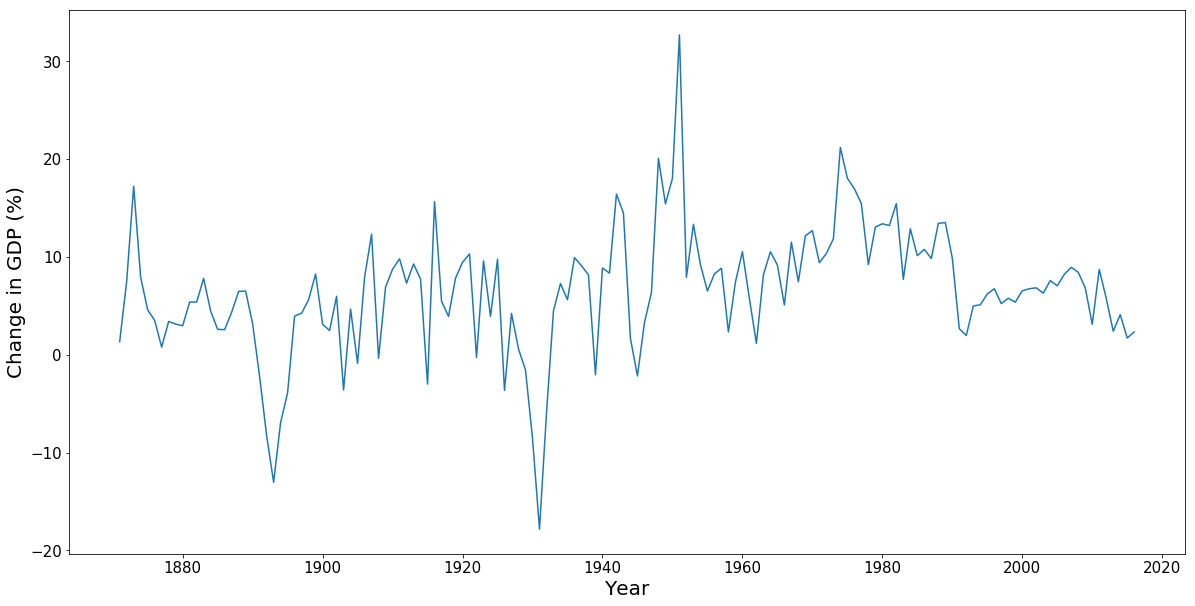

In [23]:
y = df_eco.loc[df_eco['iso']=='AUS','year']
x = df_eco.loc[df_eco['iso']=='AUS','gdpgrowth']
P1 = plt.figure(figsize=(20,10))
ax1 = P1.gca()
ax1.plot(y,x*100)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Change in GDP (%)', fontsize=20)
ax1.tick_params(labelsize=15)
plt.show()
